c:\Users\paulo.ramos\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
10:19:57 - cmdstanpy - INFO - Chain [1] start processing
10:19:57 - cmdstanpy - INFO - Chain [1] done processing


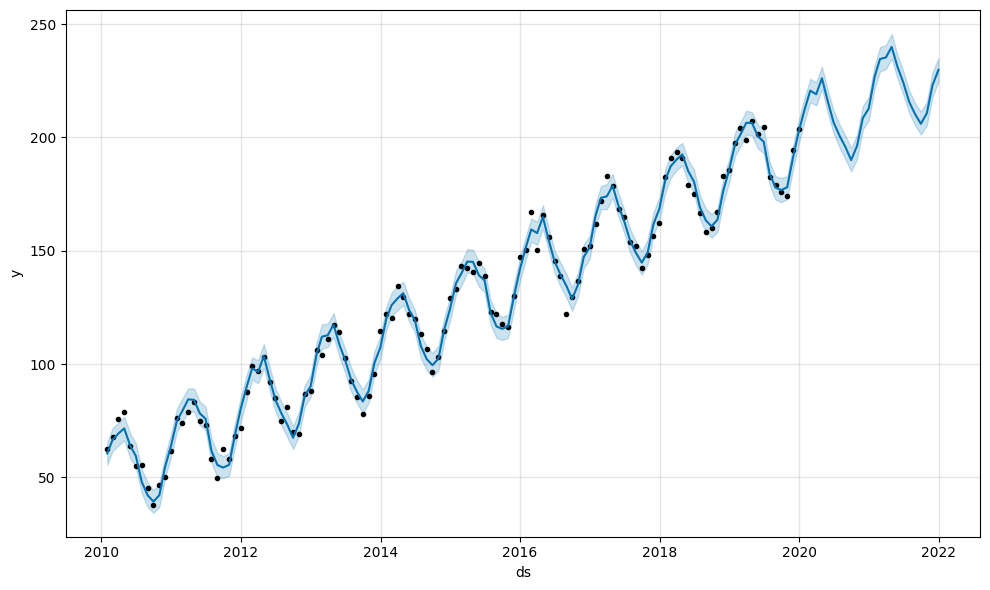

In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

# Generar datos sintéticos mensuales
np.random.seed(42)
dates = pd.date_range(start='2010-01-01', periods=120, freq='M')  # 10 años de datos
trend = np.linspace(50, 200, 120)  # Tendencia lineal
seasonality = 20 * np.sin(2 * np.pi * dates.month / 12)  # Estacionalidad anual
noise = np.random.normal(scale=5, size=120)  # Ruido aleatorio
y = trend + seasonality + noise

# Crear DataFrame en formato Prophet
df = pd.DataFrame({'ds': dates, 'y': y})

# Crear y entrenar modelo Prophet
model = Prophet(yearly_seasonality=True)
model.fit(df)

# Generar pronóstico para 24 meses futuros
future = model.make_future_dataframe(periods=24, freq='M')
forecast = model.predict(future)

# Graficar resultados
fig = model.plot(forecast)
plt.show()
